# **Decision Tree**

Decision tree (pohon keputusan) adalah sebuah metode yang digunakan dalam analisis data dan machine learning untuk membuat model prediksi atau klasifikasi. Ia menggunakan struktur pohon untuk memodelkan serangkaian keputusan dan hasil yang mungkin, dengan node internal mewakili pertanyaan atau fitur, dan node daun mewakili hasil atau klasifikasi. Decision tree ini membantu membuat prediksi dengan mengikuti jalur dari akar pohon ke node daun berdasarkan input yang diberikan.

**Struktur Pohon:**

Decision tree memiliki struktur pohon hierarkis, dimulai dari simpul akar (root node) dan bercabang ke simpul internal (internal node/decision node) dan simpul daun (leaf node/terminal node).

**Tujuan:**

Pohon keputusan bertujuan untuk memodelkan keputusan dan hasil yang mungkin berdasarkan data input, sehingga dapat digunakan untuk membuat prediksi atau klasifikasi.

**Node**:

- **Root node:** Representasi awal dari masalah atau pertanyaan yang ingin dipecahkan.
- **Internal node:** Mewakili pertanyaan atau fitur yang digunakan untuk membagi data.
- **Leaf node:** Mewakili hasil akhir dari keputusan atau klasifikasi.

Coba dengan 15 Data dengan 2 Fitur dan 3 class, yaitu Fitur mood dan waktu_luang dan menggunakan library sklearn DecisionTreeClassifier

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text

# Data
data = {
    'waktu_luang': ['pagi', 'pagi', 'pagi', 'siang', 'siang', 'siang', 'malam', 'malam', 'malam', 'pagi', 'siang', 'malam', 'siang', 'malam', 'pagi'],
    'mood': ['bahagia', 'bosan', 'sedih', 'bahagia', 'bosan', 'sedih', 'bahagia', 'bosan', 'sedih', 'bahagia', 'bosan', 'sedih', 'bahagia', 'bahagia', 'sedih'],
    'genre': ['drama', 'aksi', 'drama', 'komedi', 'aksi', 'drama', 'aksi', 'komedi', 'drama', 'komedi', 'aksi', 'drama', 'komedi', 'aksi', 'drama']
}

df = pd.DataFrame(data)

# Encode fitur kategorikal
df_encoded = pd.get_dummies(df[['waktu_luang', 'mood']])

# Label target
y = df['genre']

# Model
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(df_encoded, y)



DecisionTreeClassifier(criterion='entropy', random_state=0)

## **Pohon dan Rule nya**

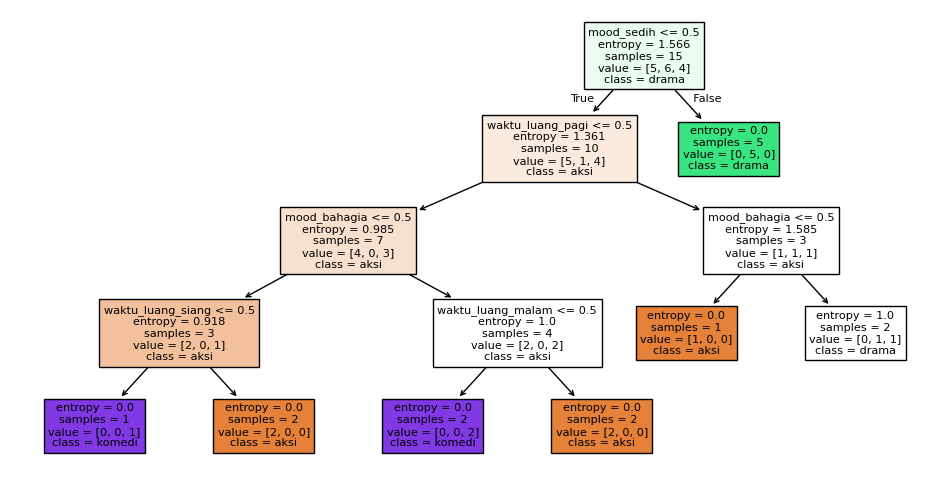


|--- mood_sedih <= 0.50
|   |--- waktu_luang_pagi <= 0.50
|   |   |--- mood_bahagia <= 0.50
|   |   |   |--- waktu_luang_siang <= 0.50
|   |   |   |   |--- class: komedi
|   |   |   |--- waktu_luang_siang >  0.50
|   |   |   |   |--- class: aksi
|   |   |--- mood_bahagia >  0.50
|   |   |   |--- waktu_luang_malam <= 0.50
|   |   |   |   |--- class: komedi
|   |   |   |--- waktu_luang_malam >  0.50
|   |   |   |   |--- class: aksi
|   |--- waktu_luang_pagi >  0.50
|   |   |--- mood_bahagia <= 0.50
|   |   |   |--- class: aksi
|   |   |--- mood_bahagia >  0.50
|   |   |   |--- class: drama
|--- mood_sedih >  0.50
|   |--- class: drama



In [2]:
plt.figure(figsize=(12, 6))
plot_tree(model, feature_names=df_encoded.columns, class_names=model.classes_, filled=True)
plt.show()

print()

# One-hot encoding untuk data kategorikal
X = pd.get_dummies(df[['waktu_luang', 'mood']])
y = df['genre']

# Model
model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(X, y)

# Ekspor aturan
rules_text = export_text(model, feature_names=list(X.columns))
print(rules_text)


In [3]:
import pandas as pd
import numpy as np
from collections import Counter
import math

# Fungsi entropy
def entropy(class_list):
    total = len(class_list)
    counter = Counter(class_list)
    ent = 0
    for count in counter.values():
        p = count / total
        ent -= p * math.log2(p)
    return ent

# Fungsi Information Gain
def information_gain(df, target_column, feature):
    # Entropy total (S)
    total_entropy = entropy(df[target_column])

    # Entropy subset (weighted entropy)
    values = df[feature].unique()
    weighted_entropy = 0
    for val in values:
        subset = df[df[feature] == val]
        weight = len(subset) / len(df)
        ent = entropy(subset[target_column])
        weighted_entropy += weight * ent

    gain = total_entropy - weighted_entropy
    return total_entropy, weighted_entropy, gain

# Hitung untuk fitur 'mood'
ent_total, ent_weighted_mood, gain_mood = information_gain(df, 'genre', 'mood')
print(f"[MOOD] Entropy total: {ent_total:.3f}, Weighted entropy: {ent_weighted_mood:.3f}, Gain: {gain_mood:.3f}")

# Hitung untuk fitur 'waktu_luang'
ent_total, ent_weighted_waktu, gain_waktu = information_gain(df, 'genre', 'waktu_luang')
print(f"[WAKTU_LUANG] Entropy total: {ent_total:.3f}, Weighted entropy: {ent_weighted_waktu:.3f}, Gain: {gain_waktu:.3f}")


[MOOD] Entropy total: 1.566, Weighted entropy: 0.800, Gain: 0.766
[WAKTU_LUANG] Entropy total: 1.566, Weighted entropy: 1.472, Gain: 0.094
